<a href="https://colab.research.google.com/github/livjab/105-project/blob/master/LJ_project_week_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With the incresed awareness of climate change, and the generally agreed upon fact that carbon emissions are causing the changes we are observing, I wanted to explore some of our alternative options for energy production. My goal is to explore which renewable options are the most feasible based on factors such as cost and geographic location, and then determine if there is enough potential in our renewable sources to produce enough energy to eventually phase out the use of fossil fuels in the United States.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## United States Renewable Energy Technical Potential

https://catalog.data.gov/dataset/united-states-renewable-energy-technical-potential

- Renewable energy technical potential as defined in this report represents the achievable energy generation of a particular technology given system performance, topographic limitations, environmental, and land-use constraints.

- The primary benefit of assessing technical potential is that it establishes an upper-boundary estimate of development potential. It is important to understand that there are multiple types of potential—resource, technical, economic, and market—each seen in Figure 1 (below), with key assumptions.


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/livjab/energy-project/master/usretechnicalpotential.csv?token=AFRLFL6VDSHXJTBVNOLSIWS4XXZBK")


In [61]:
df.shape

(51, 31)

In [62]:
df.head()

,Unnamed: 0,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
0,Alabama,35850,20,426,3706838,2114,44058,15475.0,12,0,...,1533,0,326186,0,0,535489.0,67.0,4102,0,2435
1,Alaska,166,0,2,8282976,9005,187608,NaN,1,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053
2,Arizona,121305,52,1096,11867693,5147,107230,22736.0,14,12544333,...,837,0,178188,8329,1,1239147.0,157.0,1303,0,1958
3,Arkansas,28960,15,332,4986388,2747,57239,8484.0,6,0,...,1063,0,226178,0,0,628621.0,79.0,6093,1,3268
4,California,246008,111,2320,8855917,4010,83549,106411.0,75,8490916,...,15510,1,3300211,130921,16,1344179.0,170.0,30023,6,9692


In [5]:
list(df)

['Unnamed: 0',
 'urbanUtilityScalePV_GWh',
 'urbanUtilityScalePV_GW',
 'urbanUtilityScalePV_km2',
 'ruralUtilityScalePV_GWh',
 'ruralUtilityScalePV_GW',
 'ruralUtilityScalePV_km2',
 'rooftopPV_GWh',
 'rooftopPV_GW',
 'CSP_GWh',
 'CSP_GW',
 'CSP_km2',
 'onshoreWind_GWh',
 'onshoreWind_GW',
 'onshoreWind_km2',
 'offshoreWind_GWh',
 'offshoreWind_GW',
 'offshoreWind_km2',
 'biopowerSolid_GWh',
 'biopowerSolid_GW',
 'biopowerSolid_BDT',
 'biopowerGaseous_GWh',
 'biopowerGaseous_GW',
 'biopowerGaseous_Tonnes-CH4',
 'geothermalHydrothermal_GWh',
 'geothermalHydrothermal_GW',
 'EGSGeothermal_GWh',
 'EGSGeothermal_GW',
 'hydropower_GWh',
 'hydropower_GW',
 'hydropower_countOfSites']

In [0]:
# lets stick with only the columns measuring gigawatt hours, since that's 
# what I used to measure fossil fuels below



In [63]:
df = df.iloc[:, [0, 1, 4, 7, 9, 12, 15, 18, 21, 24, 26, 28]]
df.head()

,Unnamed: 0,urbanUtilityScalePV_GWh,ruralUtilityScalePV_GWh,rooftopPV_GWh,CSP_GWh,onshoreWind_GWh,offshoreWind_GWh,biopowerSolid_GWh,biopowerGaseous_GWh,geothermalHydrothermal_GWh,EGSGeothermal_GWh,hydropower_GWh
0,Alabama,35850,3706838,15475.0,0,283,0.0,11193,1533,0,535489.0,4102
1,Alaska,166,8282976,NaN,0,1373433,NaN,513,61,15437,NaN,23675
2,Arizona,121305,11867693,22736.0,12544333,26036,NaN,1087,837,8329,1239147.0,1303
3,Arkansas,28960,4986388,8484.0,0,22892,NaN,14381,1063,0,628621.0,6093
4,California,246008,8855917,106411.0,8490916,89862,2662579.0,12408,15510,130921,1344179.0,30023


In [64]:
# rename columns

df = df.rename(columns={'Unnamed: 0': 'State', 
                        "urbanUtilityScalePV_GWh": "Urban PV", 
                        "ruralUtilityScalePV_GWh": "Rural PV", 
                        "rooftopPV_GWh": "Rooftop PV", 
                        "CSP_GWh": "CSP", 
                        "onshoreWind_GWh": "Onshore Wind", 
                        "offshoreWind_GWh": "Offshore Wind", 
                        "biopowerSolid_GWh": "Biopower Solid", 
                        "biopowerGaseous_GWh": "Biopower Gaseous", 
                        "geothermalHydrothermal_GWh": "Hydrothermal", 
                        "EGSGeothermal_GWh": "Geothermal", 
                        "hydropower_GWh": "Hydropower"})
df.head()

,State,Urban PV,Rural PV,Rooftop PV,CSP,Onshore Wind,Offshore Wind,Biopower Solid,Biopower Gaseous,Hydrothermal,Geothermal,Hydropower
0,Alabama,35850,3706838,15475.0,0,283,0.0,11193,1533,0,535489.0,4102
1,Alaska,166,8282976,NaN,0,1373433,NaN,513,61,15437,NaN,23675
2,Arizona,121305,11867693,22736.0,12544333,26036,NaN,1087,837,8329,1239147.0,1303
3,Arkansas,28960,4986388,8484.0,0,22892,NaN,14381,1063,0,628621.0,6093
4,California,246008,8855917,106411.0,8490916,89862,2662579.0,12408,15510,130921,1344179.0,30023


In [65]:
# check out nulls
df.isnull().sum()

State                0
Urban PV             0
Rural PV             0
Rooftop PV           2
CSP                  0
Onshore Wind         0
Offshore Wind       22
Biopower Solid       0
Biopower Gaseous     0
Hydrothermal         0
Geothermal           2
Hydropower           0
dtype: int64

In [0]:
# fill NAs with zeros 
# the amount of energy prodction for any NA value is zero so this makes sense

df = df.fillna(value=0)

In [0]:
# add columns with totals from each type

df["Solar Power Technologies Total"] = df["Urban PV"] + df["Rural PV"] + df["Rooftop PV"] + df["CSP"]
df["Wind Power Technologies Total"] = df["Onshore Wind"] + df["Offshore Wind"]
df["Biopower Technologies Total"] = df["Biopower Solid"] + df["Biopower Gaseous"]
df["Geothermal Energy Technologies Total"] = df["Hydrothermal"] + df["Geothermal"]
df["Hydropower Technologies Total"] = df["Hydropower"]


In [68]:
# add total total column

df["Total"] = df["Solar Power Technologies Total"] + df["Wind Power Technologies Total"] + df["Biopower Technologies Total"] + df["Geothermal Energy Technologies Total"] + df["Hydropower Technologies Total"]

df.head()

,State,Urban PV,Rural PV,Rooftop PV,CSP,Onshore Wind,Offshore Wind,Biopower Solid,Biopower Gaseous,Hydrothermal,Geothermal,Hydropower,Solar Power Technologies Total,Wind Power Technologies Total,Biopower Technologies Total,Geothermal Energy Technologies Total,Hydropower Technologies Total,Total
0,Alabama,35850,3706838,15475.0,0,283,0.0,11193,1533,0,535489.0,4102,3758163.0,283.0,12726,535489.0,4102,4310763.0
1,Alaska,166,8282976,0.0,0,1373433,0.0,513,61,15437,0.0,23675,8283142.0,1373433.0,574,15437.0,23675,9696261.0
2,Arizona,121305,11867693,22736.0,12544333,26036,0.0,1087,837,8329,1239147.0,1303,24556067.0,26036.0,1924,1247476.0,1303,25832806.0
3,Arkansas,28960,4986388,8484.0,0,22892,0.0,14381,1063,0,628621.0,6093,5023832.0,22892.0,15444,628621.0,6093,5696882.0
4,California,246008,8855917,106411.0,8490916,89862,2662579.0,12408,15510,130921,1344179.0,30023,17699252.0,2752441.0,27918,1475100.0,30023,21984734.0


In [69]:
df.dtypes

State                                    object
Urban PV                                  int64
Rural PV                                  int64
Rooftop PV                              float64
CSP                                       int64
Onshore Wind                              int64
Offshore Wind                           float64
Biopower Solid                            int64
Biopower Gaseous                          int64
Hydrothermal                              int64
Geothermal                              float64
Hydropower                                int64
Solar Power Technologies Total          float64
Wind Power Technologies Total           float64
Biopower Technologies Total               int64
Geothermal Energy Technologies Total    float64
Hydropower Technologies Total             int64
Total                                   float64
dtype: object

In [0]:
# new df with just totals columns

totals = df[["State", 
             "Solar Power Technologies Total", 
             "Wind Power Technologies Total", 
             "Biopower Technologies Total", 
             "Geothermal Energy Technologies Total", 
             "Hydropower Technologies Total"]]

totals = totals.set_index("State")

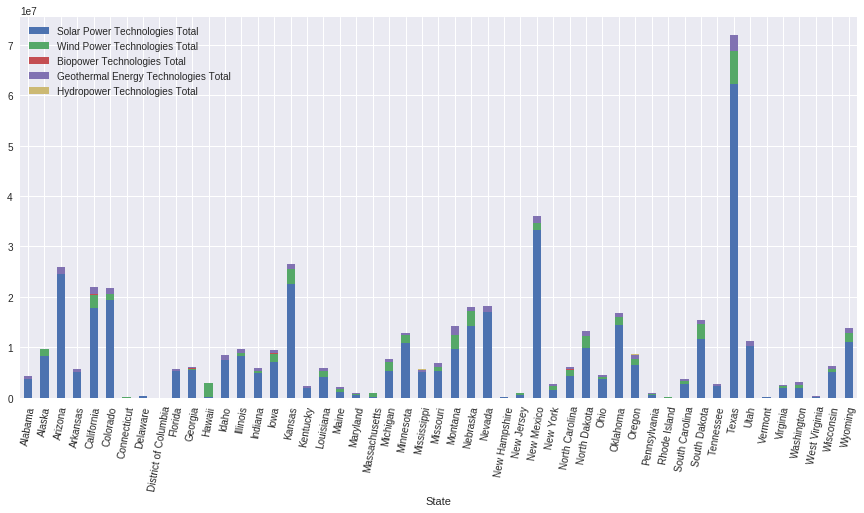

In [71]:
# time to plot some things

totals.plot.bar(stacked=True, figsize=(15, 7), rot=80);

In [17]:
!pip install plotly

In [0]:
import plotly 
plotly.tools.set_credentials_file(username='livjab', api_key='wtMvZE3WmACuXMuwMSvH')

In [0]:
# need to create state codes for plotly to work

df['code'] = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", 
              "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", 
              "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", 
              "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [0]:
# choropleth with only solar resources

solar = df.iloc[:, [0, 1, 2, 3, 4, 12, 18]]

#[["State", "Urban PV", "Rural PV", "Rooftop PV", "CSP", "Solar Power Technologies Total", "code"]]

In [82]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df1 = solar

for col in df1.columns:
    df1[col] = df1[col].astype(str)

scl = [
    [0.0, 'rgb(255, 240, 229)'],
    [0.2, 'rgb(240, 182, 147)'],
    [0.4, 'rgb(229, 138, 88)'],
    [0.6, 'rgb(222, 108, 48)'],
    [0.8, 'rgb(218, 93, 28)'],
    [1.0, 'rgb(215, 79, 9)']
]

df1['text'] = df1['State'] + '<br>' + \
    'Urban PV: ' + df1['Urban PV'] + '<br>' + \
    'Rural PV: ' + df1['Rural PV'] + '<br>' + \
    'Rooftop PV: ' + df1['Rooftop PV'] + '<br>' + \
    'CSP: ' + df1['CSP']


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df1['code'],
    z = df1['Solar Power Technologies Total'].astype(float),
    locationmode = 'USA-states',
    text = df1['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Gigawatt Hours")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Solar Power Potential by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(204, 235, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'solar-cloropleth-map')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
# choropleth with wind technologies

wind = df.iloc[:, [0, 5, 6, 13, 18]]

In [81]:
for col in wind.columns:
    wind[col] = wind[col].astype(str)

scl = [
    [0.0, 'rgb(216, 221, 253)'],
    [0.2, 'rgb(154, 165, 239)'],
    [0.4, 'rgb(71, 92, 222)'],
    [0.6, 'rgb(51, 73, 217)'],
    [0.8, 'rgb(30, 55, 213)'],
    [1.0, 'rgb(10, 37, 209)']
]

wind['text'] = wind['State'] + '<br>' + \
    'Onshore Wind: ' + wind['Onshore Wind'] + '<br>' + \
    'Offshore Wind: ' + wind['Offshore Wind'] + '<br>'


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = wind['code'],
    z = wind['Wind Power Technologies Total'].astype(float),
    locationmode = 'USA-states',
    text = wind['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Gigawatt Hours")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Wind Power Potential by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(204, 235, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'wind-cloropleth-map')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
# biopower technologies

bio = df.iloc[:, [0, 7, 8, 14, 18]]

In [85]:

for col in bio.columns:
    bio[col] = bio[col].astype(str)

scl = [
    [0.0, 'rgb(216, 243, 217)'],
    [0.2, 'rgb(179, 211, 180)'],
    [0.4, 'rgb(142, 179, 144)'],
    [0.6, 'rgb(105, 148, 107)'],
    [0.8, 'rgb(68, 116, 71)'],
    [1.0, 'rgb(32, 85, 35)']
]

bio['text'] = bio['State'] + '<br>' + \
    'Biopower Solid: ' + bio['Biopower Solid'] + '<br>' + \
    'Biopower Gaseous: ' + bio['Biopower Gaseous'] + '<br>'


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = bio['code'],
    z = bio['Biopower Technologies Total'].astype(float),
    locationmode = 'USA-states',
    text = bio['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Gigawatt Hours")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Bio Power Potential by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(204, 235, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'bio-cloropleth-map')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
# geothermal choropleth

geo = df.iloc[:, [0, 9, 10, 15, 18]]

In [91]:

for col in geo.columns:
    geo[col] = geo[col].astype(str)

scl = [
    [0.0, 'rgb(218, 208, 205)'],
    [0.2, 'rgb(202, 192, 189)'],
    [0.4, 'rgb(170, 160, 157)'],
    [0.6, 'rgb(108, 96, 93)'],
    [0.8, 'rgb(108, 96, 93)'],
    [1.0, 'rgb(81, 78, 75)']
]

geo['text'] = geo['State'] + '<br>' + \
    'Hydrothermal: ' + geo['Hydrothermal'] + '<br>' + \
    'Geothermal: ' + geo['Geothermal'] + '<br>'


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = geo['code'],
    z = geo['Geothermal Energy Technologies Total'].astype(float),
    locationmode = 'USA-states',
    text = geo['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Gigawatt Hours")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Geothermal Energy Potential by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(204, 235, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'geo-cloropleth-map')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
#hydro choropleth

hydro = df.iloc[:, [0, 11, 16, 18]]

In [97]:

for col in hydro.columns:
    hydro[col] = hydro[col].astype(str)

scl = [
    [0.0, 'rgb(192, 204, 231)'],
    [0.2, 'rgb(158, 171, 200)'],
    [0.4, 'rgb(125, 138, 169)'],
    [0.6, 'rgb(108, 122, 154)'],
    [0.8, 'rgb(75, 89, 123)'],
    [1.0, 'rgb(41, 57, 92)']
]

hydro['text'] = hydro['State'] + '<br>'


data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = hydro['code'],
    z = hydro['Hydropower Technologies Total'].astype(float),
    locationmode = 'USA-states',
    text = hydro['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Gigawatt Hours")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Hydropower Potential by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(204, 235, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'hydro-cloropleth-map')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Explore dataset with renewable vs fossil fuel production

https://www.eia.gov/totalenergy/data/monthly/
- Electricity
- Total (all sectors)

https://www.eia.gov/totalenergy/data/monthly/pdf/sec7_5.pdf

In [26]:

df1 = pd.read_csv("https://raw.githubusercontent.com/livjab/energy-project/master/MER_T07_02A.csv?token=AFRLFLYDWFBTKFVOSRC6DGK4XXZOA")

df1.head()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLETPUS,194913,135451.32,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,CLETPUS,195013,154519.994,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,CLETPUS,195113,185203.657,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,CLETPUS,195213,195436.666,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,CLETPUS,195313,218846.325,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [27]:
# drop first column because we have that info elsewhere

df1 = df1.drop(columns=["MSN"])
df1.shape

(8086, 5)

In [0]:
 # only going to keep the rows with 13th month because it is total for that year
  
 # change dtype to string so I can filter using endswith()
  
df1["YYYYMM"] = df1["YYYYMM"].astype('str')

In [29]:
# filter for values ending in "13"

df1 = df1[df1["YYYYMM"].str.endswith("13")]
df1.tail()

,YYYYMM,Value,Column_Order,Description,Unit
8033,201413,4093606.006,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8046,201513,4077600.939,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8059,201613,4076674.984,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8072,201713,4034268.432,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8085,201813,4177809.699,13,Electricity Net Generation Total (including fr...,Million Kilowatthours


In [0]:
# change dtype back to int so i can do math

df1["YYYYMM"] = df1["YYYYMM"].astype("int64")

In [31]:
df1["Year"] = (df1["YYYYMM"] - 13) / 100
df1.head()

,YYYYMM,Value,Column_Order,Description,Unit,Year
0,194913,135451.32,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1949.0
1,195013,154519.994,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1950.0
2,195113,185203.657,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1951.0
3,195213,195436.666,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1952.0
4,195313,218846.325,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1953.0


In [32]:
#drop YYYYMM column and reorder remaining columns

df1 = df1.drop(columns=["YYYYMM"])
df1 = df1[['Year', 'Value', 'Column_Order', 'Description', 'Unit']]
df1.head()

,Year,Value,Column_Order,Description,Unit
0,1949.0,135451.32,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,1950.0,154519.994,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,1951.0,185203.657,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,1952.0,195436.666,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,1953.0,218846.325,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [33]:
# check out Unit column

df1["Unit"].describe()

count                       910
unique                        1
top       Million Kilowatthours
freq                        910
Name: Unit, dtype: object

In [0]:
# remove column and remember to label any plots with 
# "Million Kilowatthours"

df1 = df1.drop(columns=["Unit"])

In [35]:
# check out description column

df1["Description"].unique()

array(['Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Petroleum, All Sectors',
       'Electricity Net Generation From Natural Gas, All Sectors',
       'Electricity Net Generation From Other Gases, All Sectors',
       'Electricity Net Generation From Nuclear Electric Power, All Sectors',
       'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors',
       'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
       'Electricity Net Generation From Wood, All Sectors',
       'Electricity Net Generation From Waste, All Sectors',
       'Electricity Net Generation From Geothermal, All Sectors',
       'Electricity Net Generation From Solar, All Sectors',
       'Electricity Net Generation From Wind, All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype=object)

In [36]:
# pivot the data to create more columns

table = df1.pivot(index="Year", columns="Description", values="Value")
table

Description,"Electricity Net Generation From Coal, All Sectors","Electricity Net Generation From Conventional Hydroelectric Power, All Sectors","Electricity Net Generation From Geothermal, All Sectors","Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors","Electricity Net Generation From Natural Gas, All Sectors","Electricity Net Generation From Nuclear Electric Power, All Sectors","Electricity Net Generation From Other Gases, All Sectors","Electricity Net Generation From Petroleum, All Sectors","Electricity Net Generation From Solar, All Sectors","Electricity Net Generation From Waste, All Sectors","Electricity Net Generation From Wind, All Sectors","Electricity Net Generation From Wood, All Sectors","Electricity Net Generation Total (including from sources not shown), All Sectors"
Year,,,,,,,,,,,,,
1949.0,135451.32,94772.992,Not Available,Not Available,36966.709,0,Not Available,28547.232,Not Available,Not Available,Not Available,386.036,296124.289
1950.0,154519.994,100884.575,Not Available,Not Available,44559.159,0,Not Available,33734.288,Not Available,Not Available,Not Available,389.585,334087.601
1951.0,185203.657,104376.12,Not Available,Not Available,56615.678,0,Not Available,28712.116,Not Available,Not Available,Not Available,390.784,375298.355
1952.0,195436.666,109708.251,Not Available,Not Available,68453.088,0,Not Available,29749.761,Not Available,Not Available,Not Available,481.647,403829.413
1953.0,218846.325,109617.396,Not Available,Not Available,79790.975,0,Not Available,38404.449,Not Available,Not Available,Not Available,389.418,447048.563
1954.0,239145.966,111639.772,Not Available,Not Available,93688.271,0,Not Available,31520.175,Not Available,Not Available,Not Available,263.434,476257.618
1955.0,301362.698,116235.946,Not Available,Not Available,95285.441,0,Not Available,37138.308,Not Available,Not Available,Not Available,276.469,550298.862
1956.0,338503.484,125236.621,Not Available,Not Available,104037.208,0,Not Available,35946.772,Not Available,Not Available,Not Available,151.678,603875.763
1957.0,346386.207,133357.93,Not Available,Not Available,114212.525,9.67,Not Available,40499.357,Not Available,Not Available,Not Available,176.678,634642.367


In [37]:
# clean up column names

table = table.rename(columns={"Electricity Net Generation From Coal, All Sectors": "Coal",
                     "Electricity Net Generation From Conventional Hydroelectric Power, All Sectors": "Hydroelectric Power",
                     "Electricity Net Generation From Geothermal, All Sectors": "Geothermal",
                     "Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors": "Hydroelectric Pumped Storage",
                     "Electricity Net Generation From Natural Gas, All Sectors": "Natural Gas",
                     "Electricity Net Generation From Nuclear Electric Power, All Sectors": "Nuclear Electric Power",
                     "Electricity Net Generation From Other Gases, All Sectors": "Other Gases",
                     "Electricity Net Generation From Petroleum, All Sectors": "Petroleum",
                     "Electricity Net Generation From Solar, All Sectors": "Solar",
                     "Electricity Net Generation From Waste, All Sectors": "Waste",
                     "Electricity Net Generation From Wind, All Sectors": "Wind",
                     "Electricity Net Generation From Wood, All Sectors": "Wood",
                     "Electricity Net Generation Total (including from sources not shown), All Sectors": "Total"})
table.head()

Description,Coal,Hydroelectric Power,Geothermal,Hydroelectric Pumped Storage,Natural Gas,Nuclear Electric Power,Other Gases,Petroleum,Solar,Waste,Wind,Wood,Total
Year,,,,,,,,,,,,,
1949.0,135451.32,94772.992,Not Available,Not Available,36966.709,0,Not Available,28547.232,Not Available,Not Available,Not Available,386.036,296124.289
1950.0,154519.994,100884.575,Not Available,Not Available,44559.159,0,Not Available,33734.288,Not Available,Not Available,Not Available,389.585,334087.601
1951.0,185203.657,104376.12,Not Available,Not Available,56615.678,0,Not Available,28712.116,Not Available,Not Available,Not Available,390.784,375298.355
1952.0,195436.666,109708.251,Not Available,Not Available,68453.088,0,Not Available,29749.761,Not Available,Not Available,Not Available,481.647,403829.413
1953.0,218846.325,109617.396,Not Available,Not Available,79790.975,0,Not Available,38404.449,Not Available,Not Available,Not Available,389.418,447048.563


In [38]:
table.tail()

Description,Coal,Hydroelectric Power,Geothermal,Hydroelectric Pumped Storage,Natural Gas,Nuclear Electric Power,Other Gases,Petroleum,Solar,Waste,Wind,Wood,Total
Year,,,,,,,,,,,,,
2014.0,1581710.35,259366.622,15876.941,-6173.548,1126608.958,797165.982,12021.786,30231.862,17691.031,21649.719,181655.282,42339.725,4093606.006
2015.0,1352398.197,249080.085,15917.575,-5091.488,1333482.11,797177.877,13116.698,28248.749,24892.904,21703.372,190718.548,41928.506,4077600.939
2016.0,1239148.654,267812.153,15825.807,-6686.127,1378306.934,805693.948,12807.432,24204.806,36054.121,21813.231,226992.562,40947.227,4076674.984
2017.0,1205835.275,300333.156,15926.765,-6494.548,1296414.692,804949.635,12468.967,21389.958,53286.174,21609.891,254302.662,41151.779,4034268.432
2018.0,1146392.716,291723.816,16728.455,-5904.539,1468012.599,807077.759,12191.182,24571.82,66603.684,21353.868,274951.815,41411.26,4177809.699


In [39]:
table.dtypes

Description
Coal                            object
Hydroelectric Power             object
Geothermal                      object
Hydroelectric Pumped Storage    object
Natural Gas                     object
Nuclear Electric Power          object
Other Gases                     object
Petroleum                       object
Solar                           object
Waste                           object
Wind                            object
Wood                            object
Total                           object
dtype: object

In [40]:
# need to all be floats to be able to do math and stuff

# but first need to deal with Nan and non numeric values

table.isnull().sum()

Description
Coal                            0
Hydroelectric Power             0
Geothermal                      0
Hydroelectric Pumped Storage    0
Natural Gas                     0
Nuclear Electric Power          0
Other Gases                     0
Petroleum                       0
Solar                           0
Waste                           0
Wind                            0
Wood                            0
Total                           0
dtype: int64

In [41]:
table.describe()

Description,Coal,Hydroelectric Power,Geothermal,Hydroelectric Pumped Storage,Natural Gas,Nuclear Electric Power,Other Gases,Petroleum,Solar,Waste,Wind,Wood,Total
count,70,70,70,70,70,70,70,70,70,70,70,70,70
unique,70,70,60,30,70,63,31,70,36,50,37,70,70
top,1733430.005,271976.936,Not Available,Not Available,294623.911,0,Not Available,40371.54,Not Available,Not Available,Not Available,36800.31,476257.618
freq,1,1,11,41,1,8,40,1,35,21,34,1,1


In [0]:
# Looking at the data, it makes sense to replace any "Not Available" entries 
# with "0" because it seems that "Not Available" was used before that specific 
# type of energy production was common, thus making 0 a valid entry to work with.

table = table.replace({"Not Available": 0})

In [0]:
table = table.astype(float)

In [44]:
table.dtypes

Description
Coal                            float64
Hydroelectric Power             float64
Geothermal                      float64
Hydroelectric Pumped Storage    float64
Natural Gas                     float64
Nuclear Electric Power          float64
Other Gases                     float64
Petroleum                       float64
Solar                           float64
Waste                           float64
Wind                            float64
Wood                            float64
Total                           float64
dtype: object

In [45]:
# need to set index so that "Year" is a non index column

table = table.reset_index()
table.head()

Description,Year,Coal,Hydroelectric Power,Geothermal,Hydroelectric Pumped Storage,Natural Gas,Nuclear Electric Power,Other Gases,Petroleum,Solar,Waste,Wind,Wood,Total
0,1949.0,135451.320,94772.992,0.0,0.0,36966.709,0.0,0.0,28547.232,0.0,0.0,0.0,386.036,296124.289
1,1950.0,154519.994,100884.575,0.0,0.0,44559.159,0.0,0.0,33734.288,0.0,0.0,0.0,389.585,334087.601
2,1951.0,185203.657,104376.120,0.0,0.0,56615.678,0.0,0.0,28712.116,0.0,0.0,0.0,390.784,375298.355
3,1952.0,195436.666,109708.251,0.0,0.0,68453.088,0.0,0.0,29749.761,0.0,0.0,0.0,481.647,403829.413
4,1953.0,218846.325,109617.396,0.0,0.0,79790.975,0.0,0.0,38404.449,0.0,0.0,0.0,389.418,447048.563


In [0]:
# would like to separate the dataframe into two categories for 
# renewable vs non renewable

renewable = table[["Year", "Hydroelectric Power", "Wood", "Waste", "Geothermal", "Solar", "Wind"]]
non_renewable = table[["Year", "Coal", "Petroleum", "Natural Gas", "Other Gases", "Nuclear Electric Power" ]]

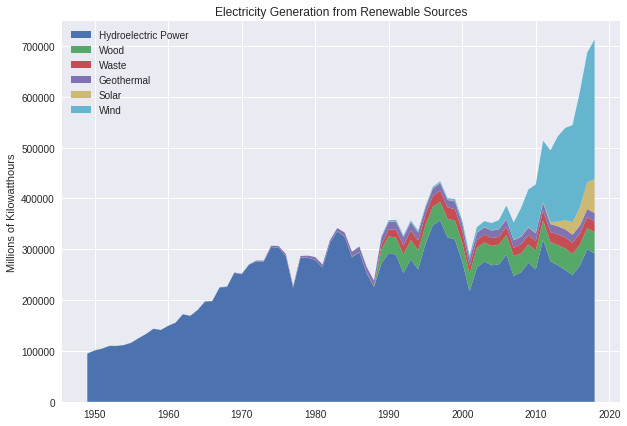

In [47]:
# now to plot!

x = renewable["Year"]
y1 = renewable["Hydroelectric Power"]
y2 = renewable["Wood"]
y3 = renewable["Waste"]
y4 = renewable["Geothermal"]
y5 = renewable["Solar"]
y6 = renewable["Wind"]

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.stackplot(x, y1, y2, y3, y4, y5, y6, labels=["Hydroelectric Power", "Wood",
                                                 "Waste", "Geothermal",
                                                 "Solar", "Wind"])
ax.legend(loc='upper left')
ax.set_title("Electricity Generation from Renewable Sources")
ax.set_ylabel("Millions of Kilowatthours")
plt.show()

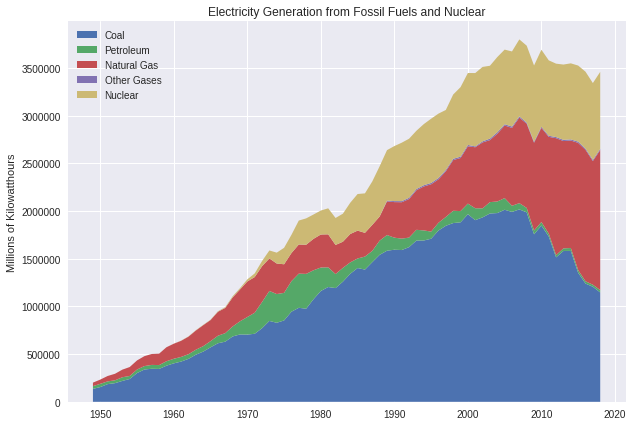

In [48]:
x = non_renewable["Year"]
y1 = non_renewable["Coal"]
y2 = non_renewable["Petroleum"]
y3 = non_renewable["Natural Gas"]
y4 = non_renewable["Other Gases"]
y5 = non_renewable["Nuclear Electric Power"]

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.stackplot(x, y1, y2, y3, y4, y5, labels=["Coal", "Petroleum", "Natural Gas",
                                            "Other Gases", "Nuclear"])
ax.legend(loc='upper left')
ax.set_title("Electricity Generation from Fossil Fuels and Nuclear")
ax.set_ylabel("Millions of Kilowatthours")
plt.show()